# Previsão de Fechamento Diário da IBOVESPA

## Introdução

O objetivo deste projeto é desenvolver um modelo preditivo para prever o fechamento diário da IBOVESPA utilizando dados históricos. Os dados utilizados incluem o fechamento diário do índice Bovespa, abrangendo o período de 2004 a 2024. Esta análise busca não apenas prever os valores futuros, mas também identificar padrões históricos e anomalias nos dados, fornecendo insights valiosos para a tomada de decisões financeiras.

## Processo:

### Coleta de Dados

Os dados foram capturados do site Investing.com, abrangendo o período de 01/01/2000 a 01/01/2024.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df_path = 'https://raw.githubusercontent.com/Tamireees/Tech_Challenge_Fase02/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa%20(2004-2024).csv'

In [24]:
dados = pd.read_csv(df_path, sep=',', parse_dates=[0], index_col='Data')

In [25]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,"10,23M","0,57%"
31.01.2024,127.752,127.402,129.558,127.326,"12,50M","0,28%"
30.01.2024,127.402,128.492,128.492,127.105,"10,04M","-0,86%"
29.01.2024,128.503,128.970,129.068,127.853,"8,76M","-0,36%"
26.01.2024,128.967,128.196,129.252,127.869,"8,51M","0,62%"


In [26]:
dados.tail()


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
08.01.2004,23.717,23.334,23.718,23.122,"436,74M","1,70%"
07.01.2004,23.320,23.576,23.899,23.320,"464,08M","-1,09%"
06.01.2004,23.576,23.532,23.976,23.180,"472,38M","0,19%"
05.01.2004,23.532,22.445,23.532,22.445,"496,71M","4,84%"
02.01.2004,22.445,22.233,22.450,22.208,"136,42M","0,94%"


In [27]:
dados.shape

(4974, 6)

### Exploração e limpeza dos dados

In [28]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4974 entries, 01.02.2024 to 02.01.2004
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4974 non-null   float64
 1   Abertura  4974 non-null   float64
 2   Máxima    4974 non-null   float64
 3   Mínima    4974 non-null   float64
 4   Vol.      4973 non-null   object 
 5   Var%      4974 non-null   object 
dtypes: float64(4), object(2)
memory usage: 272.0+ KB


In [29]:
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('.', '').replace(',', '.')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return value

In [30]:
dados['Vol.'] = dados['Vol.'].apply(convert_to_float)
print(dados.head())

             Último  Abertura   Máxima   Mínima        Vol.    Var%
Data                                                               
01.02.2024  128.481   127.752  128.481  127.284  10230000.0   0,57%
31.01.2024  127.752   127.402  129.558  127.326  12500000.0   0,28%
30.01.2024  127.402   128.492  128.492  127.105  10040000.0  -0,86%
29.01.2024  128.503   128.970  129.068  127.853   8760000.0  -0,36%
26.01.2024  128.967   128.196  129.252  127.869   8510000.0   0,62%


In [31]:
def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        value = value.replace('%', '').replace(',', '.')
        if '-' in value:
            value = value.replace('-', '')
            return float(value) * -1
        else:
            return float(value)
    return value

In [32]:
dados['Var%'] = dados['Var%'].apply(convert_percentage_to_float)

print(dados.head())

             Último  Abertura   Máxima   Mínima        Vol.  Var%
Data                                                             
01.02.2024  128.481   127.752  128.481  127.284  10230000.0  0.57
31.01.2024  127.752   127.402  129.558  127.326  12500000.0  0.28
30.01.2024  127.402   128.492  128.492  127.105  10040000.0 -0.86
29.01.2024  128.503   128.970  129.068  127.853   8760000.0 -0.36
26.01.2024  128.967   128.196  129.252  127.869   8510000.0  0.62


In [33]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4974 entries, 01.02.2024 to 02.01.2004
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4974 non-null   float64
 1   Abertura  4974 non-null   float64
 2   Máxima    4974 non-null   float64
 3   Mínima    4974 non-null   float64
 4   Vol.      4973 non-null   float64
 5   Var%      4974 non-null   float64
dtypes: float64(6)
memory usage: 272.0+ KB


In [34]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62


In [35]:
dados.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,4974.000000,4974.000000,4974.000000,4974.000000,4.973000e+03,4974.000000
mean,67.116656,67.095945,67.766885,66.432069,3.438505e+07,0.049825
std,28.255798,28.249492,28.443657,28.058351,7.981133e+07,1.703218
min,17.604000,17.607000,18.387000,17.601000,1.121000e+05,-14.780000
25%,49.181000,49.175500,49.700750,48.513250,2.820000e+06,-0.830000
50%,60.764000,60.762500,61.366500,60.081500,4.450000e+06,0.070000
75%,86.415000,86.396500,87.461750,85.745000,1.215000e+07,0.980000
max,134.194000,134.194000,134.392000,133.832000,9.949600e+08,14.660000


In [36]:
dados.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

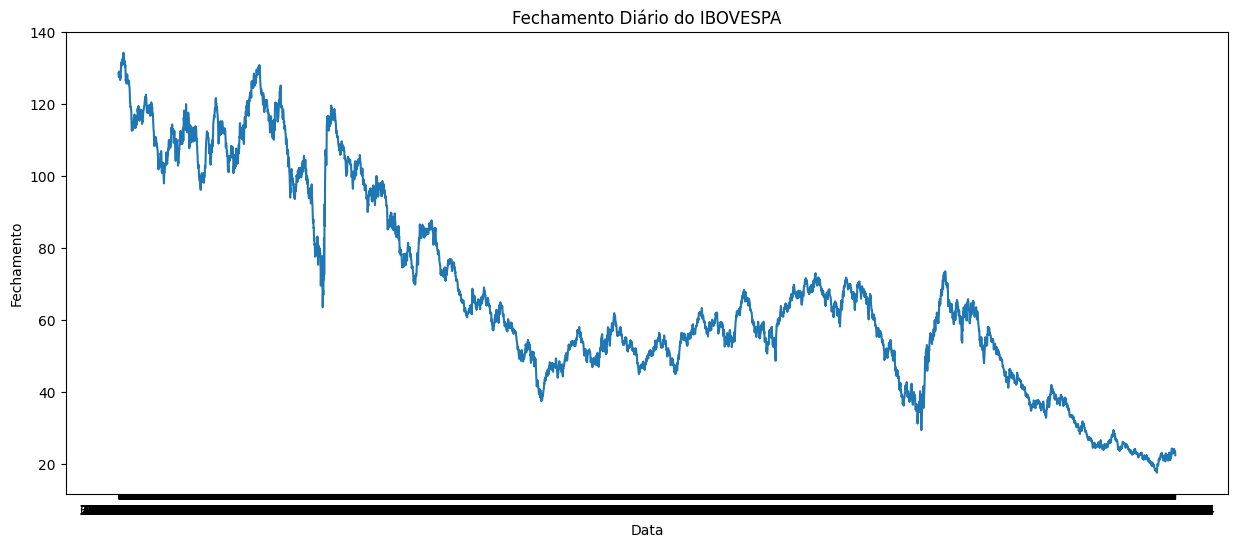

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(dados['Último'])
plt.title('Fechamento Diário do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.show()

* O objetivo do gráfico é identificar anomalias nos dados, como outliers. Observamos que, em 2004, o valor de fechamento estava entre 120 e 140. Ao longo do tempo, esses valores oscilaram até que, em uma data específica (não visível na apresentação inicial do gráfico), ocorreu uma queda acentuada. Após essa queda, houve uma recuperação significativa. No entanto, até o ano de 2024, os valores apresentaram uma tendência de queda contínua.

Essa análise preliminar sugere a necessidade de uma investigação mais detalhada para identificar os fatores que causaram essas variações extremas e as tendências de longo prazo no valor de fechamento da Bovespa.

### Modelagem

1. Identificação de Parâmetro:

2. Decomposição para analisar componentes sazonais e de tendência

3. Treinamento do Modelo 

## Resultados:

### Avaliação do modelo

### Visualização dos resultados

### Discussão sobre a acuracidade atingida

## Conclusão

### Sumário dos resultados

### Próximos passos